## The Neural Code: Spike Train Statistics 
### 1. Spike Train Statistics 

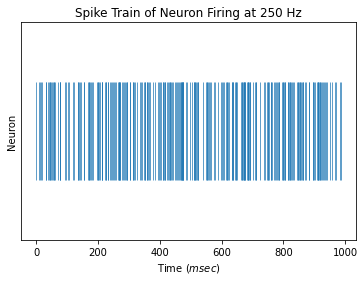

In [1]:
# Exercise 1.1 Create a Spike Train 
import numpy as np  
from matplotlib import pyplot as plt 

np.random.seed(10)
#create spike train function 
def make_train(pval, number ):
    train = np.random.binomial(n=1, p = pval, size = number)
    return train 

#plot the spike 
train = make_train(1/4, 1000)
plt.eventplot(np.where(train==1),linewidth=0.7)
plt.yticks([])
plt.title("Spike Train of Neuron Firing at 250 Hz")
plt.ylabel('Neuron') 
plt.xlabel("Time ($msec$)") 
plt.savefig("Figures/One_Neuron_Train.png")

In [2]:
# Exercise 1.2 Generate Raster Plot 
N = 300 
p = 0.08
n = 40 
np.random.seed(100)
#initialize arrays 
train_data = np.random.binomial(n=1, p = p, size = [N,1000])
total_spikes = np.zeros(N)

#compute spike train 
for i in range(N): 
    total_spikes[i] = np.sum(train_data[i])

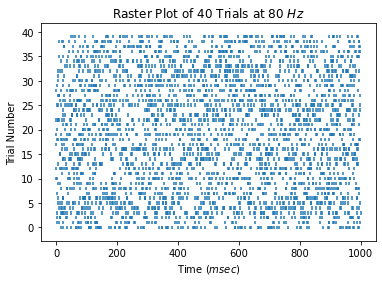

In [3]:
# 1.2 continued make plots 

# make histogram 
#plt.hist(total_spikes,bins=15)
#plt.show()

#make raster plot 
i = 0 
for i, train in enumerate(train_data[:40]): 
    plt.eventplot(np.where(train==1), lineoffsets=i,linelengths=0.7)

plt.title("Raster Plot of 40 Trials at $80$ $Hz$")
plt.xlabel("Time ($msec$)") 
plt.ylabel("Trial Number")
plt.savefig("Figures/Forty_Neuron_Train.png")
plt.show()

80.16 8.228065791342864


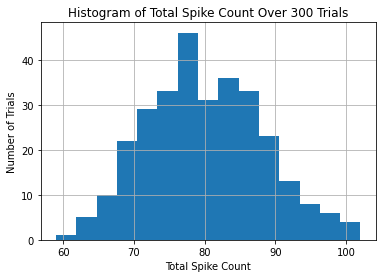

In [4]:
#1.2 make histogram 
plt.hist(total_spikes, bins = 15)
plt.xlabel("Total Spike Count")
plt.ylabel("Number of Trials")
plt.title("Histogram of Total Spike Count Over 300 Trials")
plt.grid() 
plt.savefig("Figures/spike_count_hist.png")

#compute mean and SD of spike counts 
print(np.mean(total_spikes), np.sqrt(np.var(total_spikes)))

In [5]:
# 1.3 
def delta_spike(trains): 
    
    delta_spikes=np.array([])
    
    for train in trains: 
        #find indices of spikes 
        spike_index = np.where(train==1)[0] 

        #find the interspike_interval 
        delta_spike = np.diff(spike_index)-1 #subtract by one b/c counter resetes at a spike 

        #add new delta_spike data 
        delta_spikes = np.append(delta_spikes,delta_spike) 
        
    return delta_spikes

[16. 15. 13. ... 11.  2. 19.]


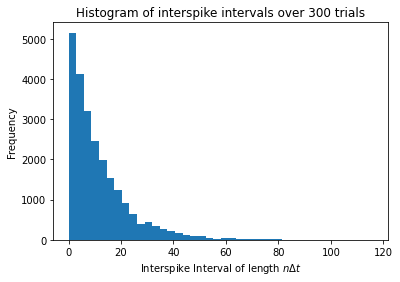

In [6]:
train_data = np.random.binomial(n=1, p = p, size = [300,1000])
isi_tot = (delta_spike(train_data))
print(isi_tot) 
plt.hist(isi_tot,bins = 40) 
plt.xlabel("Interspike Interval of length $n\Delta t$")
plt.ylabel("Frequency")
plt.title("Histogram of interspike intervals over 300 trials")
plt.savefig("Figures/interspike_hist.png")
plt.show()

In [7]:
cv = np.std(isi_tot) / np.mean(isi_tot)
cv,np.mean(isi_tot), np.std(isi_tot)

(1.0308267320655018, 11.37138630600169, 11.721928984870122)

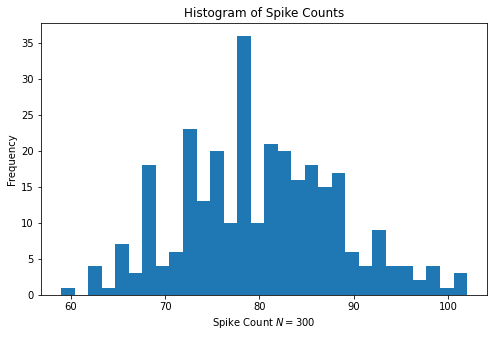

In [8]:
# 1.4 
mean = np.mean(total_spikes) 
std = np.std(total_spikes) 

plt.figure(figsize=(8,5))
plt.hist(total_spikes, bins = 30) 
plt.xlabel("Spike Count $N=300$")
plt.ylabel("Frequency")
plt.title("Histogram of Spike Counts")
plt.savefig("Figures/spike_count_1.png")

In [9]:
def inter_spike(trains): 
    total_spikes=[]
    for train in trains:
        print(train)
        spikes=[]
        i=0 
        for n in range(len(train)): 
            if train[n]==0:
                i+=1
            else: 
                spikes.append(i) 
                print(spikes) 
                i=0
        
        del spikes[0] 
        total_spikes += spikes
        print("total", total_spikes, "\n")
        
    return total_spikes 

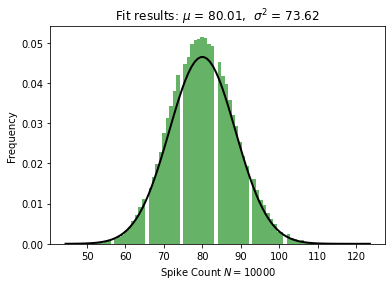

In [10]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Exercise 1.2 Generate Raster Plot 
N = 100000 
p = 0.08
n = 40 
np.random.seed(10)

#initialize arrays 
train_data = np.random.binomial(n=1, p = p, size = [N,1000])
total_spikes = np.zeros(N)

#compute spike train 
for i in range(N): 
    total_spikes[i] = np.sum(train_data[i])


# Assuming you already have data
data =total_spikes  # Replace with your data

# Plot histogram
plt.hist(data, bins=80, density=True, alpha=0.6, color='g')

# Calculate the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(data), np.std(data))

# Plot the normal distribution curve
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: $\mu$ = %.2f,  $\sigma^2$ = %.2f" % (np.mean(data), np.std(data)**2)
plt.title(title)

plt.xlabel("Spike Count $N=10000$")
plt.ylabel("Frequency")
plt.savefig("Figures/spike_count_2.png")
plt.show()

In [11]:
#2.0 Import Data
from scipy.io import loadmat
data = loadmat("simdata.mat")
time = data["t"][0]

In [12]:
#2.1 Raster Plot 
time[1]

5

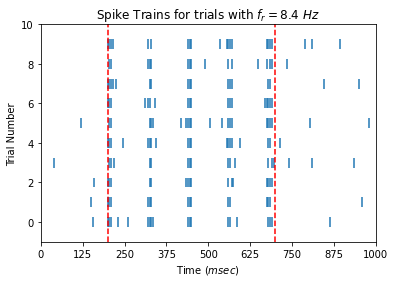

In [13]:
frq = data["f1"][0][0] # Save Frequence 
train_data = data["spt"][0][0] # get the spike train data

#create the eventplot 
for i, train in enumerate(train_data): 
    plt.eventplot(np.where(train==1), lineoffsets=i,linelengths=0.5)

# add bars showing stimulation window
plt.axvline(x=40, color = 'r', linestyle = '--') 
plt.axvline(x=140, color = 'r', linestyle = '--')

# Get current x-axis tick positions and labels
locs, labels = plt.xticks()

# Set new labels at current positions multiplied by 5
plt.xticks(locs, [int(loc * 5) for loc in locs])

plt.xlim(0,200)

#labeling 
plt.xlabel("Time ($msec$)")
plt.ylabel("Trial Number")
plt.title("Spike Trains for trials with $f_r = 8.4$ $Hz$")
plt.savefig("Figures/epfour.png")
plt.show()

In [14]:
# 2.2 Spikes Count: Mean and Variance 

def comp_mean_var(train_data):
    #store total spikes in spike window for each train 
    total_spikes = [np.sum(train[40:141]) for train in train_data]

    # calculate mean and variance 
    total_spikes_mean=np.mean(total_spikes); total_spikes_var = np.var(total_spikes) 

    #calculate the mean firing rate 
    mean_firing_rate = total_spikes_mean/(0.5)
    
    return total_spikes_mean,total_spikes_var, mean_firing_rate
#easy to show we should divide by delta of stim window

comp_mean_var(train_data)


(16.5, 3.25, 33.0)

<built-in function sum>


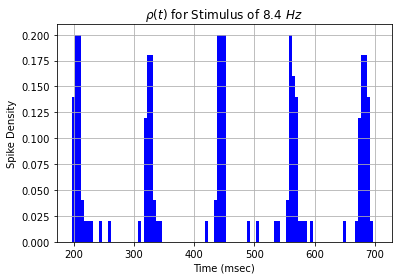

In [15]:
# 2.3 Spike Density 

#calculate number of spikes that occurs at each delta t 
def plot_spike_density(train_data, time,color='blue', alpha=1.0, title = "$\\rho (t)$ for Stimulus of $8.4$ $Hz$"):
    
    n_k = np.sum(train_data, axis=0) 
    k= len(train_data)
    delta_t = time[1]-time[0]
    rho = n_k/(k*delta_t) ### Unsure if i should be dividing by 1000 

    #create barplot 
    fig, ax = plt.subplots()

    # Create bar plot
    ax.bar(time[40:141], rho[40:141], width=delta_t,color=color, alpha=alpha)
    
    # Add labels and title
    ax.set_xlabel('Time (msec)') 
    ax.set_ylabel('Spike Density')
    ax.set_title(title)
    ax.grid()
    plt.savefig('barplot1.png')
    return fig
    
    
fig = plot_spike_density(train_data,time)
print(sum)
## NEED TO: make proper title and x axis units 

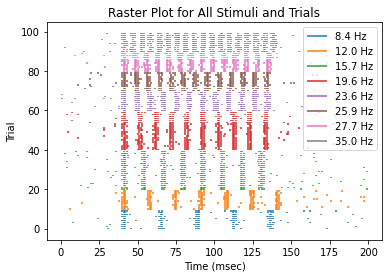

In [16]:
#2.4 All raster plots
from itertools import cycle
# adjusted function 
#calculate number of spikes that occurs at each delta t 
def plot_spike_density2(train_data, time,color='blue', alpha=1.0,ax=None):
    n_k = np.sum(train_data, axis=0) 
    k= len(train_data)
    delta_t = time[1]-time[0]
    rho = n_k/(k*delta_t/1000)


    # Create bar plot
    ax.bar(time[40:141], rho[40:141], width=delta_t,color=color, alpha=alpha)
    
# get frequencies 
fqs = data["f1"][0]
all_train_data = data["spt"][0]

#colors for plot 
colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

total_offset = 0 #need to track offsets 
labels_added = set() #keep track of labels to not double up 

#plot all event data 
for i, spike_data in enumerate(all_train_data):
    num_trials = len(spike_data)  # Number of trials in the current condition
    cur_color = next(colors) #update plot color 
    label = str(fqs[i]) + " Hz" 
    for j, train in enumerate(spike_data):
        # Adjust line offsets using the total offset
        if label not in labels_added:
            plt.eventplot(np.where(train == 1), lineoffsets=total_offset + j, linelengths=0.7, color=cur_color, label=label)
            labels_added.add(label)
        else:
            plt.eventplot(np.where(train == 1), lineoffsets=total_offset + j, linelengths=0.7, color=cur_color)



    # Update the total offset for the next condition, accounting for the trials just plotted
    total_offset += num_trials

plt.title("Raster Plot for All Stimuli and Trials")
plt.xlabel("Time (msec)")
plt.ylabel("Trial")
plt.legend() 
plt.savefig('groupraster.png')
plt.show()

# iterate through transparencies and colors 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f']
transparencies = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]


# plot each graph --- Wrong approach! Should keep plots seperate 
#for spike_data,color,alpha in zip(all_train_data,colors,transparencies): 
    #plot_spike_density(spike_data,time,color,alpha)
    

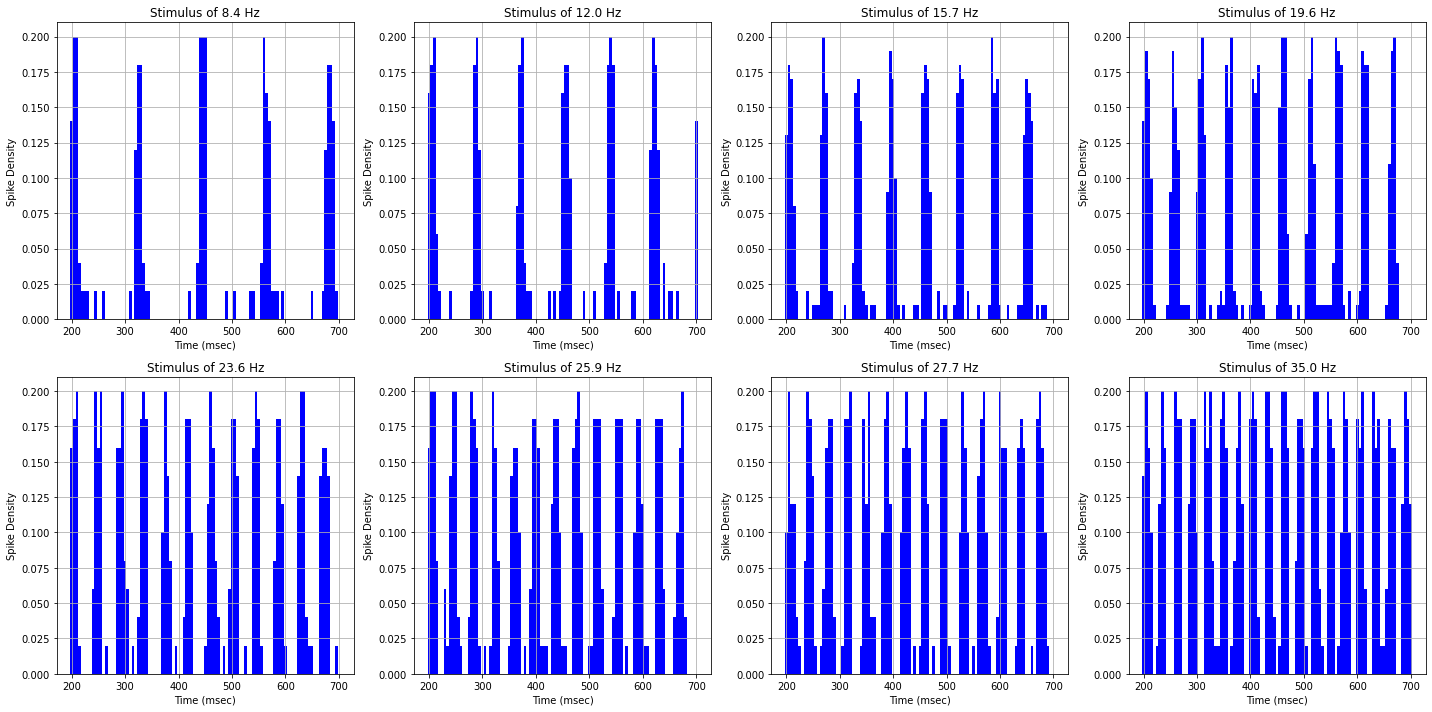

In [17]:
#2.4 continued 

#adjust function to work with subplots 
def plot_spike_density2(train_data, time, ax, color='blue', alpha=1.0, title="$\\rho (t)$ for Stimulus of $8.4$ Hz"):
    n_k = np.sum(train_data, axis=0)
    k = len(train_data)
    delta_t = time[1] - time[0]
    rho = n_k / (k * delta_t)  # Divide by 1000 if time is in msec and you want spikes/sec

    # Create bar plot on the given axis
    ax.bar(time[40:141], rho[40:141], width=delta_t, color=color, alpha=alpha)

    # Add labels and title
    ax.set_xlabel('Time (msec)')
    ax.set_ylabel('Spike Density')
    ax.set_title(title)
    ax.grid()

# Create a figure with a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust the figsize as needed

# Flatten the axes array for easier access
axes_flat = axes.flatten()

# Loop through the data, plotting each dataset on its own subplot
for i, spike_data in enumerate(all_train_data):
    cur_title = "Stimulus of "+str(fqs[i])+" Hz"
    plot_spike_density2(spike_data, time, axes_flat[i], color='blue', title=cur_title)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the entire figure
plt.savefig('combined_barplots.png')

# Show the figure
plt.show()
    

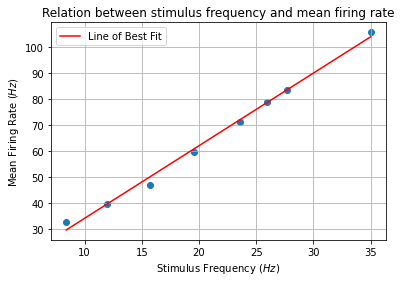

2.7926865585502387 6.313490852426878 2.0390781729276153


In [18]:
# 2.5 Mean and Variance for spikes count 

# initiate values of intereset: mean, variance, firing rate, intensity 
vals  = np.zeros((8,4))

# compute mean, var, firing rate for all fqs 
for i,(f,train_data) in enumerate(zip(fqs,all_train_data)):
    vals[i]= np.append(np.array(comp_mean_var(train_data)),f)

# plot tuning curve 
mean_firing_rates = vals[:,-2]
frequencies = vals[:,-1]

plt.scatter(frequencies, mean_firing_rates) 
plt.grid()

# Fit line of best fit
m, b = np.polyfit(frequencies, mean_firing_rates, 1)

# Compute standard error of the estimate
y_pred = m * frequencies + b
SE = np.sqrt(np.sum((mean_firing_rates - y_pred) ** 2) / (len(frequencies) - 2))

# Plot line of best fit
plt.plot(frequencies, y_pred, color='red', label='Line of Best Fit')
plt.xlabel('Stimulus Frequency ($Hz$)')
plt.ylabel('Mean Firing Rate ($Hz$)')
plt.title('Relation between stimulus frequency and mean firing rate')
plt.legend()
plt.savefig("Figures/stim_v_rate.png")

plt.show()
#relationship is ostensibly linear -- get line of best fit, find m,b and SE
print(m,b,SE) 



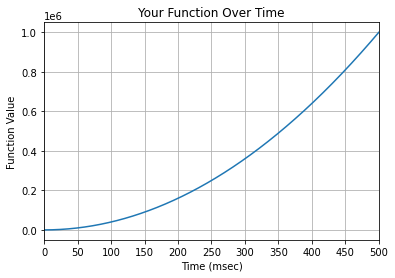

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a function to plot, e.g., y = x^2 (just as an example)
x = np.linspace(1, 1000, 1000)  # Generate 1000 x values from 1 to 1000
y = x**2  # Example function

plt.plot(x*0.5, y)  # Multiply x by 0.5 to scale the values to represent milliseconds

plt.xlabel('Time (msec)')
plt.ylabel('Function Value')
plt.title('Your Function Over Time')
plt.grid(True)

# Set x-axis limits to visually stretch from 1 to 1000 (actually representing 0.5 to 500 msec)
plt.xlim(0.5, 500)

# Optional: Customize x-axis ticks to show specific time points
xticks = np.arange(0, 501, 50)  # Example: Show a tick every 50 msec
plt.xticks(xticks)

plt.show()